In [1]:
% matplotlib inline

In [2]:
# importing libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from br_proxy import BR_proxy

In [4]:
ls

BSB2014.11.ipynb
BSB2014.11_MMDDHH.ipynb
br_proxy.py
br_proxy.pyc
catalogue_br_Mw.csv
catalogue_br_Mw.xlsx
catalogue_bsb2014.11_MMDDHH.csv
changelog.md
licence.txt
magnitude_conversion_preliminar_guidelines.png
map.png
readme.md


In [5]:
_input_file = 'catalogue_br_Mw.xlsx'
_output_file = 'catalogue_bsb2014.11'
_output_file_csv = _output_file + '.csv'
_output_file_excel = _output_file + '.xlsx'
# _sheet_name = 'Americhe'

In [6]:
# reading the excel file
df = pd.read_excel(_input_file, 
                  #'Americhe',      # specifying sheet-name
                  #index_col="En",  # index
                  #na_values=[''],  # and NaN value
                  )

# We need consider the families as strings
#df.En = df.En.astype(str)

In [7]:
df.columns

Index([u'YEAR', u'MO', u'DD', u'HH', u'MI', u'SS', u'LATITUDE', u'LONG.', u'DEPTH', u'ERR', u'MAG', u'MT', u'Q', u'Io', u'Area', u'M_TYPE', u'MW_SCOR', u'MW_BRProxy', u's_MW_BRProxy', u'ST', u'Locality', u'(Reference) Comments'], dtype='object')

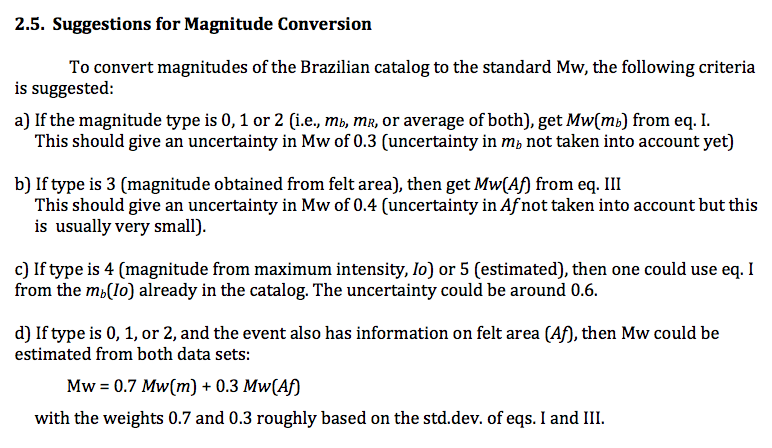

In [8]:
from IPython.display import Image
Image('magnitude_conversion_preliminar_guidelines.png')

In [9]:
p = BR_proxy()

br_proxy_mag = df.shape[0]*[np.nan]
br_proxy_sigma = df.shape[0]*[np.nan]
br_proxy_type = df.shape[0]*[np.nan]

for i, r in df.iterrows():
    # minnor clean
    if str(r.Io) == '-':
        r.Io = np.nan
    
    i0 = r.Io

    # convert to half (float) intensities
    if "-" in str(r.Io):
        i0 = float(str(r.Io)[-1]) - 0.5

    # apply rule "A"
    if r.MT in [0, 1, 2]:
        # and rule "D"
        if np.isnan(r.Area):
            mw_type = "Mw(mb)"
            mw, mw_sigma = p.from_mb(r.MAG)
        else:
            mw_type = "0.7Mw(mb)+0.3Mw(Af)"
            mw, mw_sigma = p.from_mb_af(r.MAG, r.Area)

    # apply rule "B"
    if r.MT in [3]:
        mw_type = "Mw(Af)"
        mw, mw_sigma = p.from_af(r.Area)

    # apply rule "C"
    if r.MT in [4]:
        mw_type = "Mw(mb(I0))"
        mw, mw_sigma = p.from_i0(i0)

    br_proxy_mag[i] = np.round(mw,1)
    br_proxy_sigma[i] = mw_sigma
    br_proxy_type[i] = mw_type

    
df['MW_BRProxy'] = br_proxy_mag
df['s_MW_BRProxy'] = br_proxy_sigma
df['t_MW_BRProxy'] = br_proxy_type

# df['br_proxy_mag'] = br_proxy_mag
# df['br_proxy_sigma'] = br_proxy_sigma
# df['br_proxy_type'] = br_proxy_type

to preserve original missed values on the catalog, we'll not fill them with any value, as it was. if you want this kind of file, please check the **\_MMDDHH** version.

in addition, months, days, etc.. was _"promoted"_ by pandas floats to handle its missed values.

In [10]:
df.to_csv(_output_file_csv)

In [11]:
# df.to_excel(_output_file_excel)